# Created By: Kaishma Kansal
                       18bcs6103
                       AI&ML-1(Group-B)

# Predict cancer mortality rates for US counties.
Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing datase

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding="latin-1")

In [4]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
df.shape

(3047, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

# Step 2: Cleaning the Data

In [7]:
#dropping that columns which consist of null values
df.drop(['PctSomeCol18_24','PctEmployed16_Over','PctPrivateCoverageAlone'], axis=1, inplace = True)

In [8]:
#dropping that columns that contains object type values
df.drop(['binnedInc','Geography'], axis=1, inplace = True)

# Step 3: Visualising the Data and Splitting the Data into Training and Testing Sets

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we are scaling the values.

In [10]:
df = df.apply(lambda x: np.sqrt(x))
print(df.skew())

avgAnnCount               2.532628
avgDeathsPerYear          3.324963
TARGET_deathRate         -0.099141
incidenceRate            -0.221544
medIncome                 0.877682
popEst2015                3.682163
povertyPercent            0.362679
studyPerCap               2.725369
MedianAge                 9.071926
MedianAgeMale            -0.133856
MedianAgeFemale          -0.462213
AvgHouseholdSize         -5.512913
PercentMarried           -0.946411
PctNoHS18_24              0.036089
PctHS18_24               -0.432938
PctBachDeg18_24          -0.029881
PctHS25_Over             -0.709614
PctBachDeg25_Over         0.503638
PctUnemployed16_Over     -0.049701
PctPrivateCoverage       -0.669197
PctEmpPrivCoverage       -0.220176
PctPublicCoverage        -0.341271
PctPublicCoverageAlone   -0.027874
PctWhite                 -2.167149
PctBlack                  1.232000
PctAsian                  2.375669
PctOtherRace              1.761463
PctMarriedHouseholds     -0.869586
BirthRate           

# OUTLIERS DETECTION AND TREATMENT

We are detecting the outliers using the z-Score and then using iqr method

In [11]:
from scipy import stats
df_cancer_z= np.abs(stats.zscore(df))
print(df_cancer_z)

[[1.16717558 1.2761474  0.46467793 ... 0.2810118  0.26943951 0.32583386]
 [0.35152394 0.23057752 0.59986688 ... 0.95259294 0.86093896 0.61858522]
 [0.54296023 0.37745783 0.10396515 ... 0.63021423 0.49889328 0.98096681]
 ...
 [1.60137421 0.41019332 0.88257782 ... 1.47582983 0.60021742 1.09883869]
 [1.60137421 0.36158146 0.09308468 ... 0.40020249 1.06761182 1.00059588]
 [1.60137421 0.39365502 1.23659674 ... 0.05609468 0.72595282 1.58658735]]


It is is very difficult to detect it so we are setting threshold value.

In [12]:
threshold = 3
print(np.where(df_cancer_z > 3))

(array([   9,    9,   13,   17,   20,   20,   20,   23,   29,   30,   33,
         91,   97,  100,  103,  112,  112,  112,  115,  116,  121,  122,
        123,  124,  139,  139,  139,  139,  146,  147,  148,  149,  149,
        150,  151,  151,  152,  155,  155,  159,  160,  160,  161,  164,
        165,  165,  165,  165,  165,  173,  173,  173,  175,  175,  175,
        176,  176,  176,  176,  176,  176,  176,  179,  180,  181,  183,
        183,  186,  187,  189,  190,  193,  193,  193,  193,  193,  193,
        193,  196,  199,  201,  209,  209,  209,  209,  209,  209,  216,
        221,  225,  229,  242,  244,  252,  253,  254,  255,  255,  255,
        255,  259,  259,  259,  259,  259,  259,  259,  260,  263,  263,
        263,  264,  269,  269,  270,  270,  270,  270,  270,  273,  273,
        273,  273,  273,  273,  274,  274,  281,  281,  281,  281,  281,
        281,  283,  291,  293,  294,  294,  295,  299,  299,  299,  299,
        318,  320,  333,  333,  333,  346,  346,  

In [13]:
cancer_df_o = df[(df_cancer_z < 3).all(axis=1)]

In [14]:
cancer_df_o.shape

(2512, 29)

In [15]:
Q1 = cancer_df_o.quantile(0.25)
Q3 = cancer_df_o.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

avgAnnCount                12.257754
avgDeathsPerYear            6.136936
TARGET_deathRate            1.199331
incidenceRate               1.325941
medIncome                  30.200386
popEst2015                139.414794
povertyPercent              0.990453
studyPerCap                 7.558426
MedianAge                   0.452084
MedianAgeMale               0.467634
MedianAgeFemale             0.454368
AvgHouseholdSize            0.079161
PercentMarried              0.538110
PctNoHS18_24                1.137865
PctHS18_24                  0.920039
PctBachDeg18_24             1.050012
PctHS25_Over                0.745707
PctBachDeg25_Over           0.900093
PctUnemployed16_Over        0.741044
PctPrivateCoverage          0.870182
PctEmpPrivCoverage          0.985613
PctPublicCoverage           0.839643
PctPublicCoverageAlone      0.881201
PctWhite                    0.809752
PctBlack                    2.291195
PctAsian                    0.534380
PctOtherRace                0.855834
P

In [16]:
print(cancer_df_o < (Q1 - 1.5 * IQR)) |(cancer_df_o > (Q3 + 1.5 * IQR))

      avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0           False             False             False          False   
1           False             False             False          False   
2           False             False             False          False   
3           False             False             False          False   
4           False             False             False          False   
5           False             False             False          False   
6           False             False             False          False   
7           False             False             False          False   
8           False             False             False          False   
10          False             False             False          False   
11          False             False             False          False   
12          False             False             False          False   
14          False             False             False          F

TypeError: Could not compare [None] with block values

In [17]:
cancer_df_f = cancer_df_o[~((cancer_df_o < (Q1 - 1.5 * IQR)) |(cancer_df_o > (Q3 + 1.5 * IQR))).any(axis=1)]
cancer_df_f.shape

(1426, 29)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dividing into X and Y sets for the model building

In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cancer_df_f, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
df_train[:]=scaler.fit_transform(df_train[:])

In [23]:
df_train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
313,0.376126,0.452765,0.570635,0.238591,0.425185,0.419128,0.512001,0.000000,0.547098,0.576667,...,0.598248,0.588855,0.546892,0.472022,0.938571,0.128883,0.314300,0.135361,0.576513,0.605954
1571,0.004231,0.000000,0.465838,0.877347,0.579373,0.000000,0.327673,0.000000,0.813368,0.868037,...,0.564824,0.535924,0.473995,0.290054,0.952836,0.158194,0.000000,0.149890,0.503118,0.189205
2780,0.115757,0.145269,0.526979,0.564670,0.348390,0.131572,0.744508,0.000000,0.331854,0.319546,...,0.410468,0.219582,0.513392,0.530785,0.097911,0.033666,0.236553,0.243981,0.358021,0.671789
359,0.352514,0.428972,0.436790,0.098061,0.364200,0.392974,0.444264,0.000000,0.643698,0.644379,...,0.571540,0.492895,0.594842,0.517184,0.926896,0.122289,0.307932,0.292556,0.538192,0.461046
2252,0.108861,0.133891,0.503315,0.453176,0.500222,0.102569,0.268137,0.622734,0.716709,0.723174,...,0.822154,0.601854,0.544336,0.294137,0.968685,0.097563,0.313505,0.157120,0.462143,0.436946


In [24]:
y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

# Building a model using RFE

In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', True, 1),
 ('studyPerCap', True, 1),
 ('MedianAge', True, 1),
 ('MedianAgeMale', True, 1),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 5),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', True, 1),
 ('PctHS18_24', False, 2),
 ('PctBachDeg18_24', False, 7),
 ('PctHS25_Over', False, 6),
 ('PctBachDeg25_Over', True, 1),
 ('PctUnemployed16_Over', True, 1),
 ('PctPrivateCoverage', True, 1),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', False, 8),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 9),
 ('PctBlack', True, 1),
 ('PctAsian', False, 3),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 4)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'PercentMarried', 'PctNoHS18_24',
       'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverageAlone', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['AvgHouseholdSize', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctPublicCoverage', 'PctWhite', 'PctAsian', 'BirthRate'],
      dtype='object')

In [30]:
X_train_rfe = X_train[col]

In [31]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [33]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:24   Log-Likelihood:                 1139.1
No. Observations:                 998   AIC:                            -2236.
Df Residuals:                     977   BIC:                            -2133.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Now we are dropping the variables which have high p-values.

In [34]:
x = X_train_rfe.drop(['povertyPercent'],axis=1)
import statsmodels.api as sm
x_train_lm1 = sm.add_constant(x)
lm1 = sm.OLS(y_train,x_train_lm1).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:27   Log-Likelihood:                 1138.9
No. Observations:                 998   AIC:                            -2238.
Df Residuals:                     978   BIC:                            -2140.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [35]:
x = x.drop(['MedianAgeMale','MedianAge','MedianAgeFemale'],axis=1)
import statsmodels.api as sm
x_train_lm2 = sm.add_constant(x)
lm2 = sm.OLS(y_train,x_train_lm2).fit() 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     251.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:29   Log-Likelihood:                 1137.7
No. Observations:                 998   AIC:                            -2241.
Df Residuals:                     981   BIC:                            -2158.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [36]:
x = x.drop(['PctNoHS18_24'],axis=1)
import statsmodels.api as sm
x_train_lm3 = sm.add_constant(x)
lm3 = sm.OLS(y_train,x_train_lm3).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     267.5
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:30   Log-Likelihood:                 1135.7
No. Observations:                 998   AIC:                            -2239.
Df Residuals:                     982   BIC:                            -2161.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [37]:
x = x.drop(['PctPublicCoverageAlone','medIncome',],axis=1)
import statsmodels.api as sm
x_train_lm4 = sm.add_constant(x)
lm4 = sm.OLS(y_train,x_train_lm4).fit() 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     305.5
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:31   Log-Likelihood:                 1130.8
No. Observations:                 998   AIC:                            -2234.
Df Residuals:                     984   BIC:                            -2165.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1064 

In [38]:
x = x.drop(['PctBachDeg25_Over','studyPerCap','PercentMarried'],axis=1)
import statsmodels.api as sm
x_train_lm5 = sm.add_constant(x)
lm5 = sm.OLS(y_train,x_train_lm5).fit() 
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     393.3
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:32   Log-Likelihood:                 1125.7
No. Observations:                 998   AIC:                            -2229.
Df Residuals:                     987   BIC:                            -2175.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0719 

In [39]:
x = x.drop(['PctOtherRace'],axis=1)
import statsmodels.api as sm
x_train_lm6 = sm.add_constant(x)
lm6 = sm.OLS(y_train,x_train_lm6).fit() 
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     433.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:33   Log-Likelihood:                 1122.3
No. Observations:                 998   AIC:                            -2225.
Df Residuals:                     988   BIC:                            -2176.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0497 

In [40]:
x = x.drop(['const'],axis=1)
import statsmodels.api as sm
x_train_lm7 = sm.add_constant(x)
lm7 = sm.OLS(y_train,x_train_lm7).fit() 
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     433.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:40   Log-Likelihood:                 1122.3
No. Observations:                 998   AIC:                            -2225.
Df Residuals:                     988   BIC:                            -2176.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0497 

# Residual Analysis 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
y_train_death= lm7.predict(x_train_lm7)

Text(0.5, 0, 'Errors')

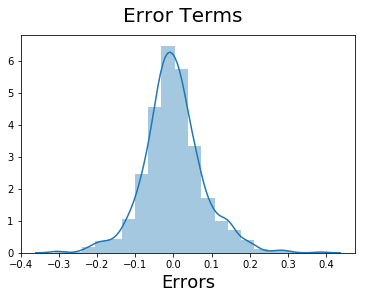

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_death), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Making Predictions

In [45]:
df_test[:]=scaler.fit_transform(df_test[:])

In [46]:
y_test = df_test.pop('TARGET_deathRate')

X_test =df_test

In [47]:
x_test_m4= X_test[x.columns]
x_test_m4 = sm.add_constant(x_test_m4)

In [49]:
Y_p = lm7.predict(x_test_m4)

# Model evaluation

Text(0, 0.5, 'y_test')

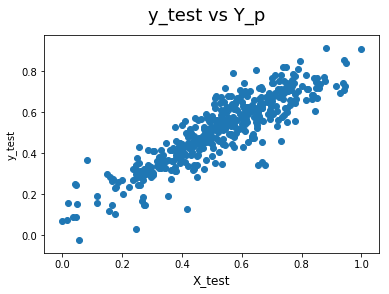

In [50]:
#plotting t_test and y_pre to understand 
fig= plt.figure()
#ax.plot([x_train_new1.min(), x_train_new1.max()], [x_train_new1.min(), x_train_new1.max()], 'r', lw=4)
plt.scatter(y_test,Y_p )
fig.suptitle('y_test vs Y_p', fontsize = 18)
plt.xlabel('X_test',fontsize = 12)
plt.ylabel('y_test',fontsize = 10)

In [51]:
lm7.params

const                   0.049670
avgAnnCount            -5.956881
avgDeathsPerYear        5.273835
incidenceRate           0.618586
popEst2015              0.493050
PctUnemployed16_Over    0.090560
PctPrivateCoverage     -0.192612
PctEmpPrivCoverage      0.150706
PctBlack                0.043139
PctMarriedHouseholds    0.064609
dtype: float64

# Conclusion

# Best fit line

TARGET_deathRate= 0.049670-5.956881*avgAnnCount+5.273835*avgDeathsPerYear+0.618586*incidenceRate+0.493050*popEst2015+0.090560*PctUnemployed16_Over
-0.192612*PctPrivateCoverage+0.150706*PctEmpPrivCoverage+0.043139*PctBlack+0.064609*PctMarriedHouseholds